 <font size = 1000px color = 'royalblue'><center><b>Titanic - Machine Learning from Disaster<b></center></font>
 

<hr>

# <u>Problem Statement</u> : -


* Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

* We may also want to develop some early understanding about the domain of our problem. This is described on the Kaggle competition description page here. Here are the highlights to note.

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


# Data Description : -


**1. pclass: A proxy for socio-economic status (SES)**
- 1st = Upper
- 2nd = Middle
- 3rd = Lower
    

**2. age:**

* Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


**3. sibsp: The dataset defines family relations in this way...**

* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)
    

**4. parch: The dataset defines family relations in this way...**


* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

**4. Embarked :-**

* Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton



# Work Flow:

1. Acquire the Data
2. Data Exploration
3. Check For Correlation Among Features and Between Features and Target
4. Creating New Features That May Impact Significance in prediction
5. Data Cleaning and Preprocessing/ Feature Engineering
6. Feature Selection using Random Forest
7. Evaluating Different Models
8. Selecting Model With Best Score And Predicting the unseen Test data to Model



<hr>

<font color = "#191970" size=6px><center><b>Import Required Libraries</b></font>

In [1]:
# Data Wrangling and Data Analysis

import pandas as pd , numpy as np

# Visualization

from matplotlib import pyplot as plt, style
import seaborn as sns

# Feature Engineering / Feature Selection

from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from sklearn.preprocessing import StandardScaler

# Model Building

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics

# Ignore Warings

import warnings
warnings.filterwarnings("ignore")

<font color = "#191970" size=6px><center><b>Data Collection</b></font>

In [2]:
# Read Train Data 
df_train = pd.read_csv("../input/titanic/train.csv")

# Read Test Data 
df_test = pd.read_csv("../input/titanic/test.csv")

# Combine Train and Test DataFrame in a List
combine_df = [df_train, df_test]

<font color = "#191970" size=6px><center><b>Exploratory Data Anylysis</b></font>

### Shape Of Train and Test Data

In [3]:
print(f"Train Shape : {combine_df[0].shape}\nTest Shape : {combine_df[1].shape}")

Train Shape : (891, 12)
Test Shape : (418, 11)


### Lets Look at Columns Of data 

In [4]:
print(df_train.select_dtypes([np.float64,np.int64]).columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


* **Numeric Features** : -

    * **Continous** :- Age, Fare.
    * **Discrete** :-  SibSp, Parch.

In [5]:
print(df_train.select_dtypes(np.object).columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


* **Categorical : -**

   * **Nominal** :- Survived, Sex, and Embarked. 
   * **Ordinal** :-  Pclass.
   
   


### Lets View Our Data Once

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Lets Check for null Values

In [7]:
# Lets Check For Null Values by percentage

df_train.isnull().sum()/df_train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<font color = "blue" size=4px> <b>Interpretation :</b></font><font color = "red" size=4px>**Age** is have nearly **20%** Missing data, **Cabin** is Having **77%** Missing Data, **Embarked** is having very low amount of missing value so we will fill it with mode of the column </font>

### Lets Check The Distribution of Our Data

In [8]:
# Making Numeric and Categorical Variables Separate for analysis

num_columns = df_train[['Age','SibSp','Parch','Fare']]
cat_columns = df_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]


* #### Lets View Distrubition Of Categorical Variables

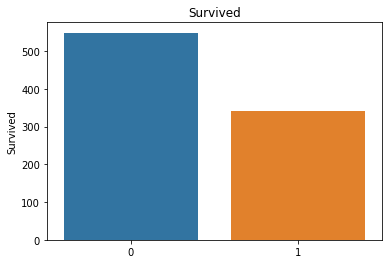

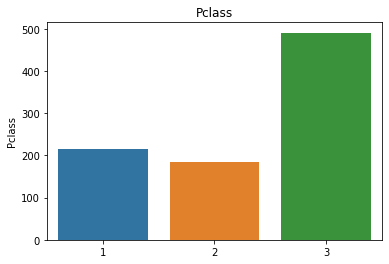

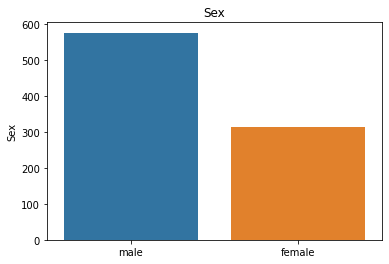

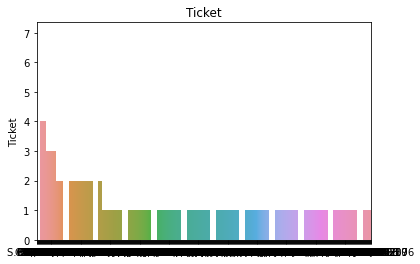

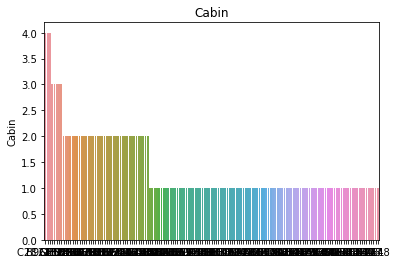

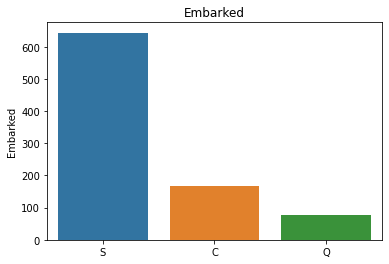

In [9]:
for column in cat_columns.columns:
    sns.barplot(cat_columns[column].value_counts().index,cat_columns[column].value_counts()).set_title(column)
    plt.show()
    

<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px> There Are More People Who Did not Survived therefore the data is not balanced</font>
* <font color = "red" size=4px> There Were More Passengers In Plass 3  </font>
* <font color = "red" size=4px> There Were More Males on Board</font>
* <font color = "red" size=4px> Most passengers Embarked From Port S = Southampton </font>
* <font color = "red" size=4px> We need to do Feature Engineering on Cabin And Ticket to make it more Clean</font>

### Lets Check Correlation Between Features and Between Feature and Target

*  ####  Lets Check If Pclass is playing Significant Variance In prediction of Survival rate

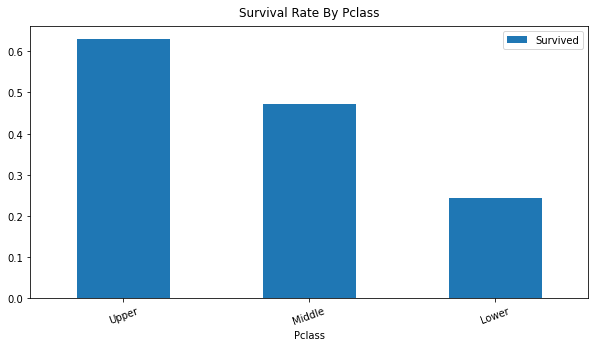

In [10]:
# Plot Survival Rate By Pclass

df_train[['Pclass','Survived']].groupby(["Pclass"]).mean().sort_values(by="Survived", ascending=False).plot(kind = 'bar',figsize = (10,5))
plt.xticks([0,1,2],["Upper","Middle","Lower"],rotation = 20)
plt.title("Survival Rate By Pclass",pad=10)
plt.show()


<font color = "blue" size=4px> <b>Interpretation : </b></font><font color = "red" size=4px> We Can Infere That Passengers who blong to **Upper class** Has higher Survival rate than other classes, So Pclass has Significant Role in prediction of survival rate , so we will use it as feature </font>

*  ####  Lets Check If Sex is playing any Significant Variance In prediction of Survival rate

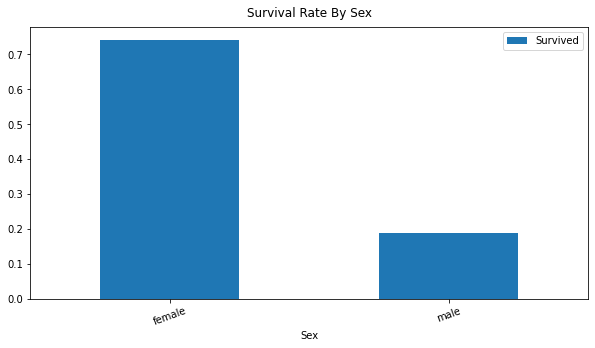

In [11]:
# Plot Survival Rate By Sex

df_train[['Sex','Survived']].groupby(["Sex"]).mean().sort_values(by="Survived", ascending=False).plot(kind = 'bar',figsize = (10,5))
plt.xticks(rotation = 20)
plt.title("Survival Rate By Sex",pad=10)
plt.show()

<font color = "blue" size=4px> <b>Interpretation : </b></font><font color = "red" size=4px> We Can Infere That **Females** has Higher Survival Rate Than **Males** , so we will use it as feature </font>

*  ####  Lets Check If Parch and SibSp is playing any Significant Variance In prediction of Survival rate

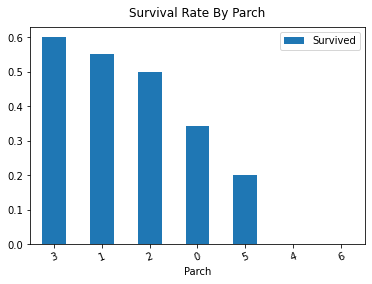

In [12]:
# Plot Survival Rate By Parch

df_train[['Parch','Survived']].groupby(["Parch"]).mean().sort_values(by="Survived", ascending=False).plot(kind = 'bar')
plt.xticks(rotation = 20)
plt.title("Survival Rate By Parch",pad=10)
plt.show()


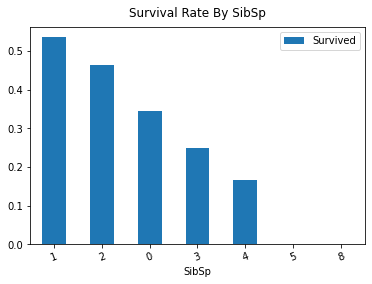

In [13]:
# Plot Survival Rate By SibSp

df_train[['SibSp','Survived']].groupby(["SibSp"]).mean().sort_values(by="Survived", ascending=False).plot(kind = 'bar')
plt.xticks(rotation = 20)
plt.title("Survival Rate By SibSp",pad=10)
plt.show()

<font color = "blue" size=4px> <b>Interpretation : </b></font><font color = "red" size=4px> We Can Infere That **Parch** and **SibSP** are having zero correlation for some values , so we will combine some values and use it as feature </font>

*  ####  Lets Check If Age is Showing Significant Variance In prediction of Survival rate

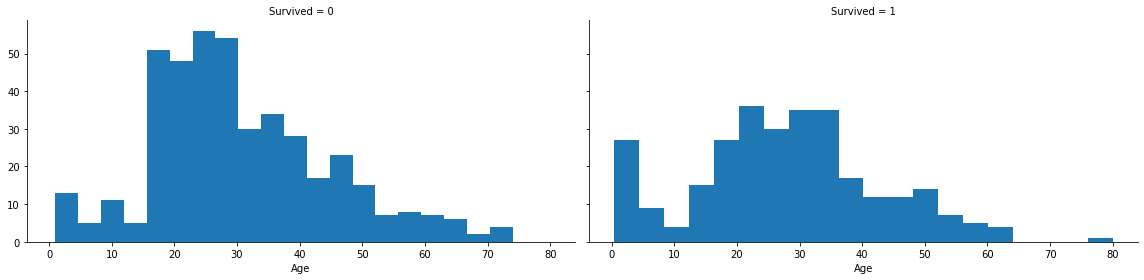

In [14]:
# Plot Age Hitogram With Age Distribution in Both Survived and Not Survived

p = sns.FacetGrid(df_train,col="Survived",height=4,aspect=2)
p.map(plt.hist,"Age",bins = 20)

<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px> Infants i.e age < 4 had higher Survival Rate  </font>
* <font color = "red" size=4px> Elderly People i.e age = 80 had survived  </font>
* <font color = "red" size=4px> Large number of 15-25 year olds did not survive.</font>
* <font color = "red" size=4px> Most passengers are in 15-35 age range.</font>
* <font color = "red" size=4px> Lets make this in Categories by binning them in ranges </font>

* #### Lets Check The Significance Of Fare in Predicting Survival Rate

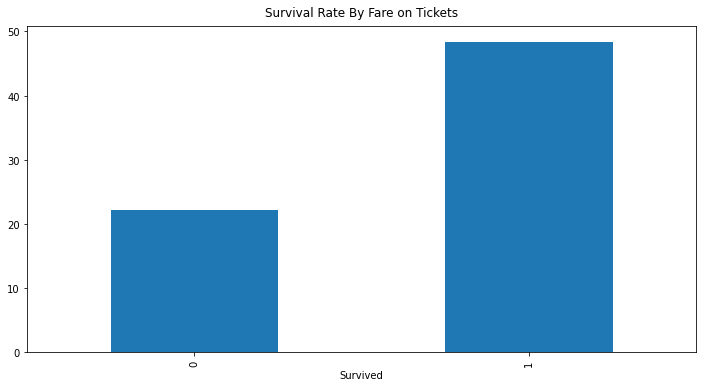

In [15]:
# Plot Survival Rate By Fare

df_train.groupby("Survived")["Fare"].mean().plot(kind = "bar",figsize = (12,6))
plt.title("Survival Rate By Fare on Tickets",pad=10)
plt.show()

*  ####  Lets Check If Emabarked is Showing Significant Variance In prediction of Survival rate

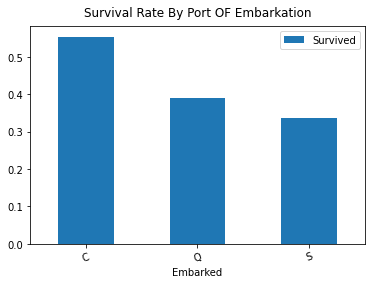

In [16]:
# Plot Survival Rate By Embarkation

df_train[['Embarked','Survived']].groupby(["Embarked"]).mean().sort_values(by="Survived", ascending=False).plot(kind = 'bar')
plt.xticks(rotation = 20)
plt.title("Survival Rate By Port OF Embarkation",pad=10)
plt.show()

<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px> Passengers with Port of Embarkation	**C = Cherbourg**  had higher Survival Rate than other ports </font>
* <font color = "red" size=4px> As the Data is Nominal, We will perform one hot encoding incude it as Feature</font>


*  ####  Lets Check Realtionship Between Pclass and Emabarked towards Survival rate

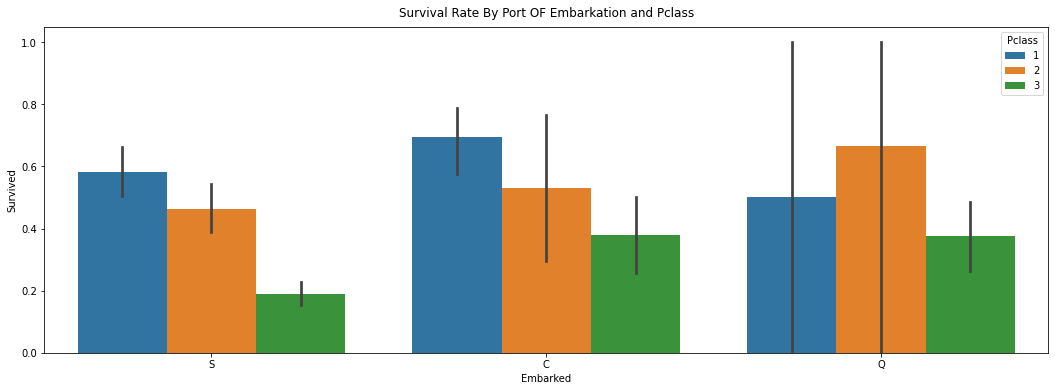

In [17]:
plt.figure(figsize=(18,6))
sns.barplot(data= df_train, x = "Embarked", y = "Survived", hue = "Pclass")
plt.title("Survival Rate By Port OF Embarkation and Pclass",pad=10)
plt.show()

<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px> There were more Survivers From Pclass 1 and also Embarkation Cherboug as there are more passengers belonging to Pclass from Port C</font>
* <font color = "red" size=4px> Port Q Has Lowest Pclass Members so it had Lower Survival Rate</font>


<font color = "#191970" size=6px><center><b>Data Cleaning And Data Preprocessing</b></font>

### Lets See If Cabin Playes Any Important Role In Survival Rate

* #### Lets draw out Letters Of Cabin Name

In [18]:
# Lets Draw Letter From Ticket in both Train and test data

for df in combine_df:
    df['Cabin_name'] = df.Cabin.apply(lambda x: str(x)[0])

df_train.Cabin_name.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_name, dtype: int64

#### Compare Survival Rate By Cabin Name (n = na)

In [19]:
pd.pivot_table(df_train,index='Survived',columns='Cabin_name', values = 'PassengerId', aggfunc='count')

Cabin_name,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


* #### Lets See If Passengers Had Same Cabin


In [20]:
pd.DataFrame(df_train.groupby("Cabin_name",as_index="False")["PassengerId"].nunique())

,PassengerId
Cabin_name,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1
n,687


<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px> Some Cabin Names Shows Signifance in Survival Rate , Lets keep it for experimental purpose </font>
* <font color = "red" size=4px>Looks Like Some Passengers had Multiple Cabins </font>


### Lets See If Ticket Playes Any Important Role In Survival Rate

* #### Lets draw out Tickets With numbers And without numbers and check if they show any significance in survival rates


In [21]:
for df in combine_df:
    df["Ticket_Numeric"] = df.Ticket.apply(lambda x : 1 if x.isnumeric() else 0)

df_train.Ticket_Numeric.value_counts()

1    661
0    230
Name: Ticket_Numeric, dtype: int64

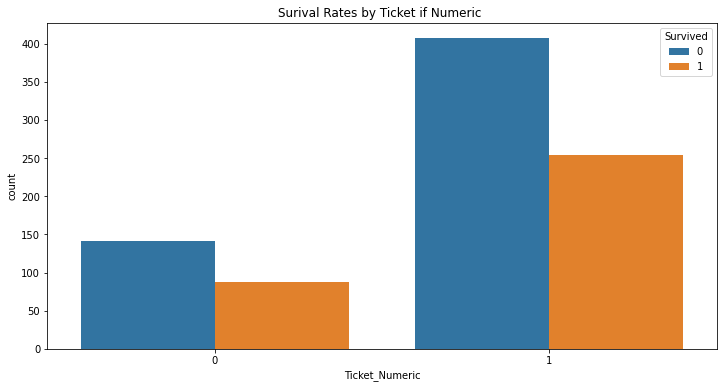

In [22]:
# Lets See If Ticket Numeric Plays Any Significant role In survival rate
plt.figure(figsize=(12,6))
sns.countplot(data= df_train, x = "Ticket_Numeric", hue = "Survived").set_title("Surival Rates by Ticket if Numeric ")
plt.show()

<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px> Its Evident That Numeric Tickets has Higher Survival Rate, but the data is not balanced , Numeric Tickets are more ,So  Lets keep it for experimental purpose </font>

<hr>

* ### The Age column Has Missing Values, if we take the mean it might get us biased reults, we can use multiple methods to fill na values 

1. <font  size=4px>We can use find correlated columns to age i.e Sex or Pclass and then Substitute The Age respective to the grouped age by categories of Pcalss or Sex, but Pclass has only 3 categores and Sex has only 2 , we dont have enough variance to get more accurate imputation

2. <font  size=4px>Take out the Title From Name Column Group Age With respect to Title and Substitue the missing age with median age of each title class, this will give higher variance in predicting age and more accurate Imputation
 <p>

<hr>

In [23]:
# Fetching Title From Name

for df in combine_df:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    
df_train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Countess      1
Lady          1
Capt          1
Sir           1
Ms            1
Mme           1
Jonkheer      1
Name: Title, dtype: int64

<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "darkred" size=4px> Some title Are spelled differently but they bleong to same title : </font>
    * <font color = "darkred" size=3px> **Mlle** is French Abbrivation For **Miss** </font>
    * <font color = "darkred" size=3px> **Ms** is Used when we dont know maritial-status of women as there is only one entry we will categorize is in **Miss** </font>
    * <font color = "darkred" size=3px> **Mme** a French title of respect equivalent to **Mrs** </font><br>
    
    
    
* <font color = "darkred" size=4px> As there are Not Much count in some titles, we will put them in others.. </font>

<hr>

In [24]:
for df in combine_df:
    # Replace Rare Titles As Others
    df.Title = df.Title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Others')
    
    # Replace Similar Titles In Single category
    df.Title = df.Title.replace(["Mlle","Ms"],"Miss")
    df.Title = df.Title.replace("Mme","Mrs")
    
df_train.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Others     23
Name: Title, dtype: int64

* #### Lets See If Title is Playing significance role in survival rate

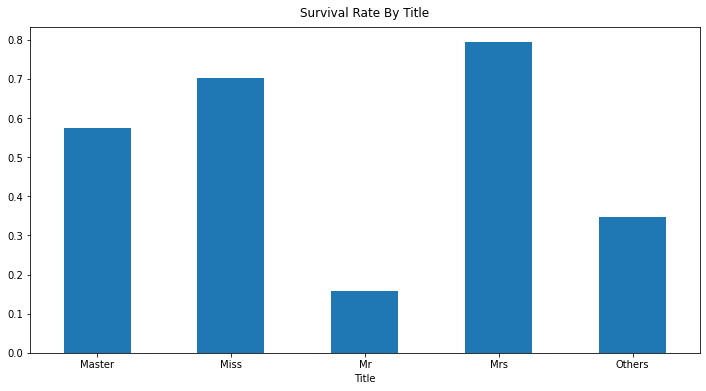

In [25]:
plt.figure(figsize=(12,6))
df_train.groupby("Title")["Survived"].mean().plot(kind = "bar")
plt.xticks(rotation=0)
plt.title("Survival Rate By Title",pad=10)
plt.show()

<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px> It is Evident That Passengers with **age < 18**, **Females** and **Others** has Survived more inspite is imbalance in proportion  </font>
   

<hr>

### Lets Now Fill the Missing Values In Age Column With respect to Title and perform Necessary Task : 

* <font color = "darkred" size=3px>Combine Parch and SibSp as family_size and ultimately to Alone</font>
* <font color = "darkred" size=3px> Drop Irrelevant Columns Such as Cabin , Name , Ticket , PassengerId</font>
* <font color = "darkred" size=3px> Perform One Hot Encoding for Categorical Nominal Features (Title, Pclass, Sex, Embarked)</font>
* <font color = "darkred" size=3px> Fill Missing Values For Embarked i.e with mode of column</font>
* <font color = "darkred" size=3px> Convert Object column to Categories</font>

In [26]:
for df in combine_df:
    df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

df_train[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family_Size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


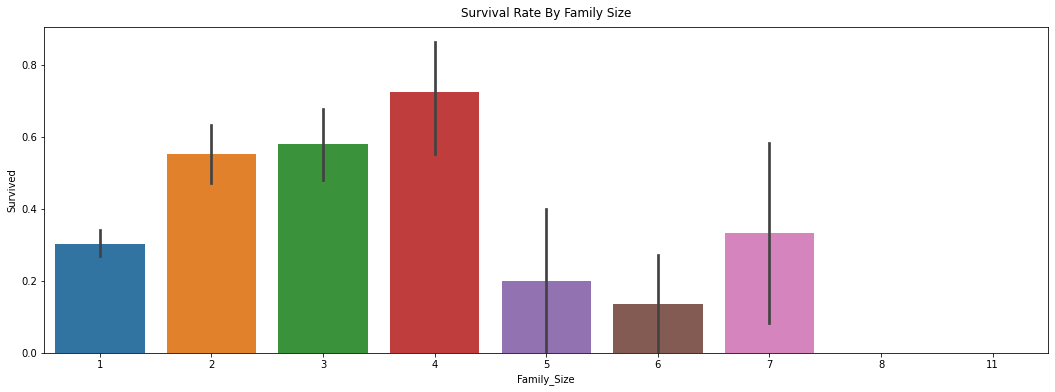

In [27]:
plt.figure(figsize=(18,6))
sns.barplot(data= df_train, x = "Family_Size", y = "Survived")
plt.title("Survival Rate By Family Size",pad=10)
plt.show()

<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px>It is Evident that Family Size 2-3 had good Survival rate  </font>
* <font color = "red" size=4px>Individua with No Family had less survival rate than individuals with family  </font>
* <font color = "red" size=4px>Family size > 7 had zero Survival Rate</font>
* <font color = "red" size=4px>Lets Keep this Feature for Experimental Purpose</font>

<hr>

### Lets Draw some more Inferences

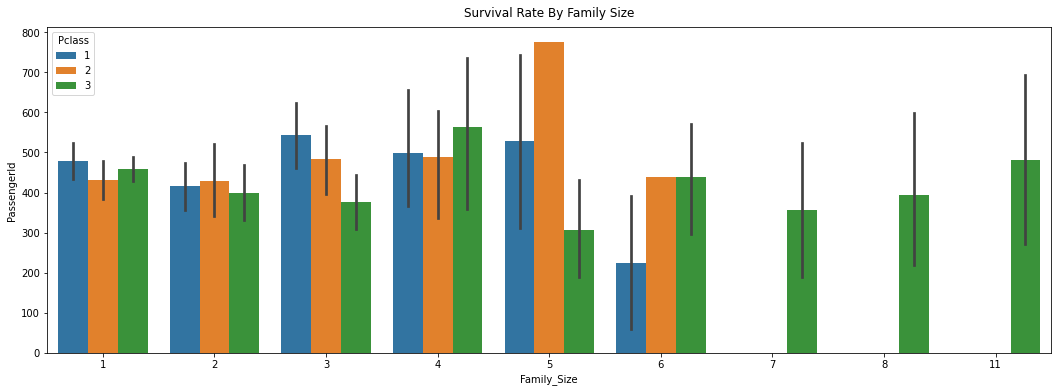

In [28]:
plt.figure(figsize=(18,6))
sns.barplot(data= df_train, x = "Family_Size", y = "PassengerId",hue ="Pclass")
plt.title("Survival Rate By Family Size",pad=10)
plt.show()

<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px>It is Evident that Family Size > 6 had no individual from Pclass 1 </font>
 
<hr>

### Lets Create Alone Column Indicating If Passenger is alone or with Family

In [29]:
for df in combine_df:
    df['Alone'] = 0
    df.loc[df['Family_Size'] == 1, 'Alone'] = 1

df_train[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()


,Alone,Survived
0,0,0.505650
1,1,0.303538


### Lets See if Alone status of Passengers Plays Significant Role in Survival Rate

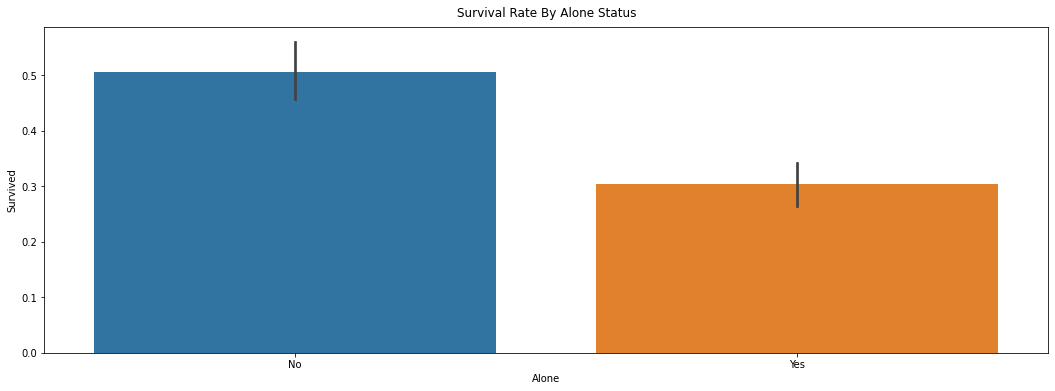

In [30]:
plt.figure(figsize=(18,6))
sns.barplot(data= df_train, x = "Alone", y = "Survived")
plt.xticks([0,1],["No","Yes"])
plt.title("Survival Rate By Alone Status",pad=10)
plt.show()

<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px>It is Evident that Passenger With Family Had Higher Survival Rate Than Passenger who was on Board alone </font>
* <font color = "red" size=4px>Lets Keep This Feature For experimental Purpose</font>
 
<hr>

In [31]:
# Get Median age for each title

df_train.groupby("Title")["Age"].median()

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Others    48.5
Name: Age, dtype: float64

In [32]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_name',
       'Ticket_Numeric', 'Title', 'Family_Size', 'Alone'],
      dtype='object')

In [33]:
# Create Function to do all above task 

    
# Fill Missing Age Values
df_train.Age = df_train.groupby("Title").Age.apply(lambda x:x.fillna(x.median()))
df_test.Age = df_test.groupby("Title").Age.apply(lambda x:x.fillna(x.median()))
    
# Fill Missing Value Of Embarked Column using mode
df_train.Embarked = df_train.Embarked.fillna(df_train.Embarked.mode()[0])
df_test.Embarked = df_test.Embarked.fillna(df_train.Embarked.mode()[0])

# Dropping irrelevant columns  
df_train.drop(columns=["PassengerId","Name","Ticket","Cabin","Parch","SibSp","Ticket_Numeric","Alone"],inplace=True)
df_test.drop(columns=["PassengerId","Name","Ticket","Cabin","Parch","SibSp","Ticket_Numeric","Alone"],inplace=True)
    


In [34]:
# Lets Create Dummy Variables For Categorical Nominal Features

df_train = pd.get_dummies(data=df_train,columns=["Sex","Embarked","Title","Cabin_name","Pclass"],drop_first=True)
df_test = pd.get_dummies(data=df_test,columns=["Sex","Embarked","Title","Cabin_name","Pclass"],drop_first=True)

#### Filling the null Value present in Fare 


In [35]:
df_test.Fare.fillna(df_test.Fare.median(),inplace=True)

### Lets Verify Data After Cleaning


In [36]:
# Verifying If Null Values present

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Age           891 non-null    float64
 2   Fare          891 non-null    float64
 3   Family_Size   891 non-null    int64  
 4   Sex_male      891 non-null    uint8  
 5   Embarked_Q    891 non-null    uint8  
 6   Embarked_S    891 non-null    uint8  
 7   Title_Miss    891 non-null    uint8  
 8   Title_Mr      891 non-null    uint8  
 9   Title_Mrs     891 non-null    uint8  
 10  Title_Others  891 non-null    uint8  
 11  Cabin_name_B  891 non-null    uint8  
 12  Cabin_name_C  891 non-null    uint8  
 13  Cabin_name_D  891 non-null    uint8  
 14  Cabin_name_E  891 non-null    uint8  
 15  Cabin_name_F  891 non-null    uint8  
 16  Cabin_name_G  891 non-null    uint8  
 17  Cabin_name_T  891 non-null    uint8  
 18  Cabin_name_n  891 non-null    

In [37]:
# Verifying If Null Values present

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           418 non-null    float64
 1   Fare          418 non-null    float64
 2   Family_Size   418 non-null    int64  
 3   Sex_male      418 non-null    uint8  
 4   Embarked_Q    418 non-null    uint8  
 5   Embarked_S    418 non-null    uint8  
 6   Title_Miss    418 non-null    uint8  
 7   Title_Mr      418 non-null    uint8  
 8   Title_Mrs     418 non-null    uint8  
 9   Title_Others  418 non-null    uint8  
 10  Cabin_name_B  418 non-null    uint8  
 11  Cabin_name_C  418 non-null    uint8  
 12  Cabin_name_D  418 non-null    uint8  
 13  Cabin_name_E  418 non-null    uint8  
 14  Cabin_name_F  418 non-null    uint8  
 15  Cabin_name_G  418 non-null    uint8  
 16  Cabin_name_n  418 non-null    uint8  
 17  Pclass_2      418 non-null    uint8  
 18  Pclass_3      418 non-null    

In [38]:
# Drop Cabin_bame_T in train as its not available on test

df_train.drop(columns=["Cabin_name_T"],inplace=True)

### Set Features and Target

In [39]:
features = df_train.drop(columns = "Survived")
target = df_train.Survived
feature_col = features.columns

### Standardise the data

In [40]:
features = StandardScaler().fit_transform(features)

print("Shape of features : ",features.shape)

Shape of features :  (891, 19)


### Remove Features with Zero Variance

In [41]:
# Check for Columns with Zero Variance In data Set

var_thres = VarianceThreshold(threshold=0.7)

features_var = pd.DataFrame(features,columns=feature_col)

var_thres.fit(features_var)
constant_columns = [column for column in features_var if column not in features_var.columns[var_thres.get_support()]]
print("Varible with Zero Variance : ",constant_columns)

Varible with Zero Variance :  []


<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px>There are no Features with constant Variance</font>

 
<hr>

<hr>

<font color = "#191970" size=10px><center><b>Model Building</b></font>
    
<hr>

<font color = "#191970" size=5px><center><b>Lets Build Model With All Variables</b></font>

### Grid Search

In [42]:
# grid_param = {
#     'n_estimators': [100,200],
#     'criterion':['gini','entropy'],
#     'max_depth': [4,5,6],
#     'min_samples_split':[1,3,5,6,7],
#     'min_samples_leaf':[2,5,6],
#     }
    

# gridModel_test = GridSearchCV(RandomForestClassifier(),param_grid=grid_param,n_jobs=-1,verbose=3)
# gridModel_test.fit(features,target)


# # Get best Parameters 

# gridModel_test.best_params_

<font color = "#191970" size=4px><b>Kfold Cross validation Score</b></font>

In [43]:
# Instantiate KFold

kf = KFold(n_splits=5,shuffle=True,random_state=1)

In [44]:
# Kfold Score

rfmodel1 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth = None,min_samples_leaf=2,min_samples_split=6,n_jobs=-1,random_state=1)

rfmodel1.fit(features,target)

print("Model Score : ",rfmodel1.score(features,target))

# Model Score
print(metrics.classification_report(target,model_selection.cross_val_predict(rfmodel1,features, target,cv = kf)))

rf_score = model_selection.cross_val_score(rfmodel1,features,target,cv=kf)


Model Score :  0.9034792368125701
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       549
           1       0.81      0.72      0.76       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.83      0.83      0.82       891



### Get Important Features

In [45]:
# Get Important Features

labels = list(feature_col)
feature_importances = pd.DataFrame({'Importance':rfmodel1.feature_importances_},index=labels).sort_values(by='Importance',ascending=False)

In [46]:
# Features Having almost zero variance

feature_importances[feature_importances.Importance < 0.001]

,Importance
Cabin_name_G,0.00094


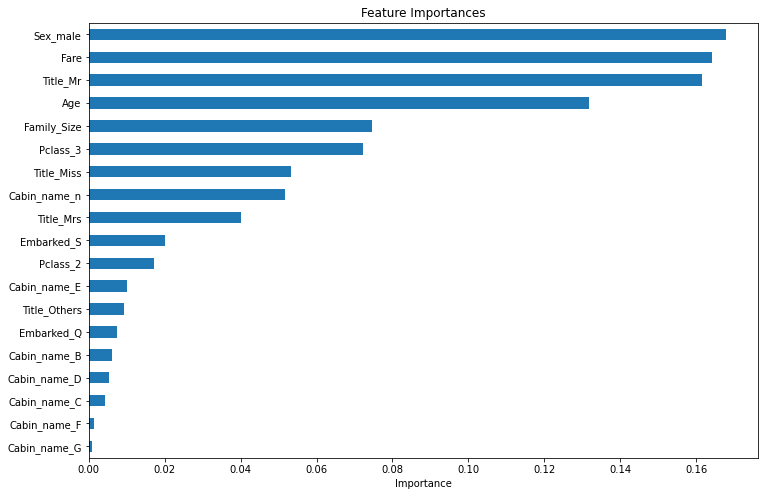

In [47]:
# lets plot them

feature_importances.Importance.sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))
plt.xlabel('Importance')

plt.title("Feature Importances")
plt.show()


<font color = "blue" size=4px> <b>Interpretation : </b></font>

* <font color = "red" size=4px>Title Mr is having High Variance as Well as Sex</font>
* <font color = "red" size=4px>Cabin_name_G and Cabin_name_T is having Zero Variance</font>


 
<hr>

<font color = "#191970" size=5px><center><b>Lets Build Model With Significant Variables</b></font>

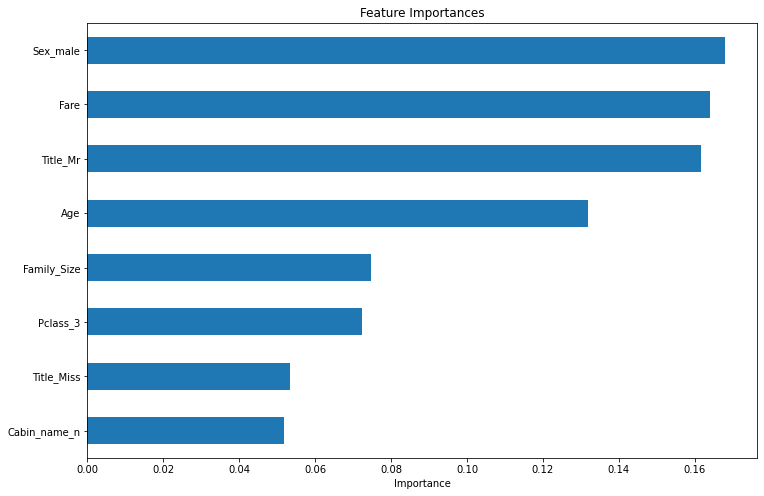

In [48]:
# lets plot them

# Features Having almost zero variance

feature_importances = feature_importances[feature_importances.Importance > 0.050]

feature_importances.Importance.sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))
plt.xlabel('Importance')

plt.title("Feature Importances")
plt.show()


### Set Features and Target

In [49]:
features = df_train[feature_importances.index]
target = df_train.Survived
feature_col = features.columns

### Standardise the data

In [50]:
features = StandardScaler().fit_transform(features)

print("Shape of features : ",features.shape)

Shape of features :  (891, 8)


### Grid Search

In [51]:
# grid_param = {
#     'n_estimators': [70,100,200],
#     'criterion':['gini','entropy'],
#     'max_depth': [4,5,6],
#     'min_samples_split':[1,3,5,6,7],
#     'min_samples_leaf':[2,5,6],
#     }
    

# gridModel_test = GridSearchCV(RandomForestClassifier(),param_grid=grid_param,n_jobs=-1,verbose=3)
# gridModel_test.fit(features,target)


# # Get best Parameters 

# gridModel_test.best_params_

In [52]:
# Kfold Score

rfmodel_sig = RandomForestClassifier(n_estimators=500,criterion='gini',max_depth = None,min_samples_leaf=1,min_samples_split=6,n_jobs=-1,random_state=1)

rfmodel_sig.fit(features,target)

print("Model Score : ",rfmodel_sig.score(features,target))

# Model Score
print(metrics.classification_report(target,model_selection.cross_val_predict(rfmodel_sig,features, target,cv = kf)))

rf_score_sig = model_selection.cross_val_score(rfmodel_sig,features,target,cv=kf)


Model Score :  0.9337822671156004
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       549
           1       0.80      0.72      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



<font color = "#191970" size=5px><center><b>Gradient Boost</b></font>

<font color = "#191970" size=4px><b>Kfold Cross validation Score</b></font>

In [53]:
# Kfold Score

gbmodel1 = RandomForestClassifier(n_estimators=1000,criterion='gini',max_depth = None,min_samples_leaf=1,min_samples_split=7,n_jobs=-1,random_state=1)

print("\n")
# fit Model
gbmodel1.fit(features,target)
print("Model Score : ",gbmodel1.score(features,target))
print("\n")

# Model Score
print(metrics.classification_report(target,model_selection.cross_val_predict(gbmodel1,features, target,cv = kf)))

gb_score_sig = model_selection.cross_val_score(gbmodel1,features,target,cv=kf)



Model Score :  0.9259259259259259


              precision    recall  f1-score   support

           0       0.83      0.90      0.87       549
           1       0.82      0.71      0.76       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.81       891
weighted avg       0.83      0.83      0.83       891



<font color = "#191970" size=5px><center><b>XG Boost</b></font>

### Grid Search

In [54]:
# param_grid = {
#     'n_estimators': [450,500,550],
#     'colsample_bytree': [0.0,0.8,0.85],
#     'max_depth': [None,1,2,5],
#     'reg_alpha': [1,0.5],
#     'reg_lambda': [10,15,19],
#     'subsample': [0.55, 0.6, 0.65],
#     'learning_rate':[0.5],
#     'gamma':[0.01,0.5,1,2],
#     'min_child_weight':[0.01,0.5],
#     'sampling_method': ['uniform']
# }

# grid_search=GridSearchCV(XGBClassifier(eval_metric = "error"),param_grid=param_grid,n_jobs=-1,verbose=3)
# grid_search.fit(features,target)

# Getting Best Params
# grid_search.best_params_

<font color = "#191970" size=4px><b>Kfold Cross validation Score</b></font>

In [55]:
# Instantiate KFold

kf = KFold(n_splits=5,shuffle=True,random_state=1)

In [56]:
# Kfold Score

xgbmodel1 = XGBClassifier(colsample_bytree=0.4, eval_metric='error',sampling_method='uniform',
                         gamma=0.1,learning_rate=0.06,max_depth=None, min_child_weight=1,n_estimators=550,
                         n_jobs=4,reg_alpha=1,reg_lambda=0.5, subsample=1)

print("\n")
# fit Model
xgbmodel1.fit(features,target)
print("Model Score : ",xgbmodel1.score(features,target))
print("\n")

# Model Score
print(metrics.classification_report(target,model_selection.cross_val_predict(xgbmodel1,features, target,cv = kf)))

xgb_score_sig = model_selection.cross_val_score(xgbmodel1,features,target,cv=kf)



Model Score :  0.9191919191919192


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.81      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



### <font color = "#191970" size=5px><center><b>Model Evaluation</b></font>

In [57]:
# Checking Model With Best Score

Models = pd.DataFrame({
    'Model': ['Random Forest','Random Forest Sig','Gradient Boosting','XGB'],
    'Score': [rf_score.mean(),rf_score_sig.mean(),gb_score_sig.mean(),xgb_score_sig.mean()]})
Models.sort_values(by='Score', ascending=False)

,Model,Score
3,XGB,0.831674
2,Gradient Boosting,0.828303
0,Random Forest,0.827205
1,Random Forest Sig,0.820451


* ##  Now lets do prediction on Unseen Test Data

#### 1. Select Most significant Features For test Data Set

In [58]:
df_test_sig = df_test[feature_importances.index]

df_test_sig.shape

(418, 8)

#### 2. Standardise the data

In [59]:
df_test_sig = StandardScaler().fit_transform(df_test_sig)

#### 3. Prediction

In [60]:
#Predictions

Prediction_rf = rfmodel_sig.predict(df_test_sig)
Prediction_gb = pd.Series(gbmodel1.predict(df_test_sig))
Prediction_xgb = pd.Series(xgbmodel1.predict(df_test_sig))

In [61]:
# Lets Read test data to get id coloum

test_df_submission =  pd.read_csv("../input/titanic/test.csv")

In [62]:
# Save Prediction in Csv File

my_submission_rf = pd.DataFrame({'PassengerId': test_df_submission.PassengerId, 'Survived': Prediction_rf})
my_submission_gb = pd.DataFrame({'PassengerId': test_df_submission.PassengerId, 'Survived': Prediction_gb})
my_submission_xgb = pd.DataFrame({'PassengerId': test_df_submission.PassengerId, 'Survived': Prediction_xgb})

# Submit
my_submission_rf.to_csv('submission.csv', index=False)